In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Cargar datos
data = pd.read_csv('C:/Users/USUARIO/OneDrive - SHI S.A.S/Camilo/ML/Time_Series_Forecasting_v2/raw_data.csv',
                   delimiter=";")  
data['fecha'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
data.set_index('fecha', inplace=True)
data.rename(columns={"Pptn1m [mm]": "PP"}, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 876 entries, 1950-01-01 to 2022-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    876 non-null    int64  
 1   Month   876 non-null    int64  
 2   PP      876 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 27.4 KB


In [5]:
df=data[["PP"]]
train_size = int(len(df)*0.8)
train, test= df.iloc[:train_size], df.iloc[train_size:]

In [6]:
scaler= MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [7]:
def create_sequences(data,seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i:i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

In [8]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(seq_length,1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")
model.summary()
#Entrenamiendo del módelo
model.fit(X_train, y_train,
          epochs=20,
          batch_size=16, 
          validation_data=(X_test,y_test))

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0444 - val_loss: 0.0193
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - val_loss: 0.0190
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - val_loss: 0.0189
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - val_loss: 0.0189
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - val_loss: 0.0188
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - val_loss: 0.0188
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - val_loss: 0.0187
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - val_loss: 0.0187
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - val_loss: 0.0186
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - val_loss: 0.0186
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - val_loss: 0.0186
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - val_l

In [9]:
train_predict = model.predict(X_train)
test_predict = model.predict(y_test)

#Invertir la normalización
train_predict = scaler.inverse_transform(train_predict) 
test_predict = scaler.inverse_transform(test_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


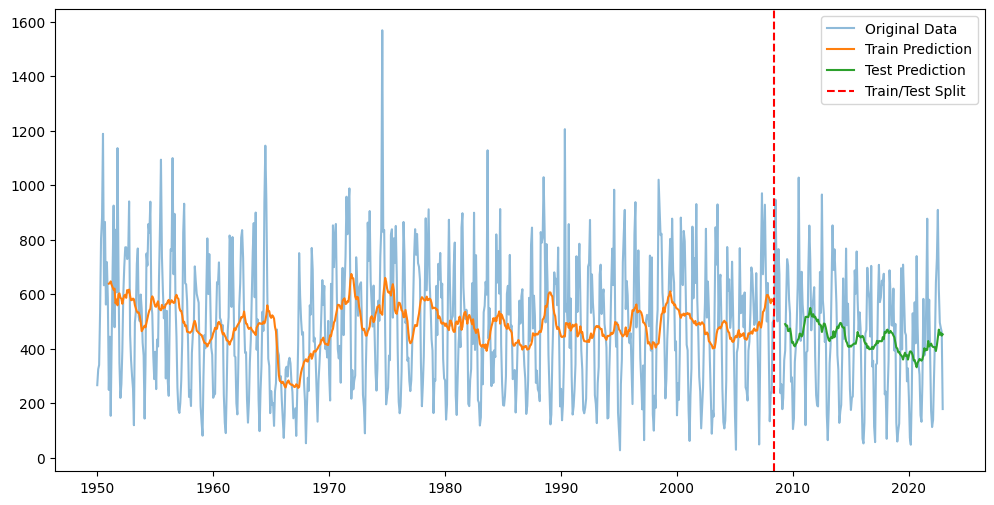

In [10]:
import matplotlib.pyplot as plt
# Ajustar las dimensiones de train_predict_plot y test_predict_plot
train_predict_plot = np.empty_like(df.values)
train_predict_plot[:, :] = np.nan
train_predict_plot[seq_length:len(train_predict)+seq_length, :] = train_predict

test_predict_plot = np.empty_like(df.values)
test_predict_plot[:, :] = np.nan

# Ajustar el índice de test_predict_plot para evitar el error
start_idx = len(df) - len(test_predict)
test_predict_plot[start_idx:, :] = test_predict

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df.index, df.values, label='Original Data', alpha=0.5)
plt.plot(df.index, train_predict_plot, label='Train Prediction')
plt.plot(df.index, test_predict_plot, label='Test Prediction')

# Añadir una línea vertical para separar el entrenamiento de la prueba
plt.axvline(df.index[train_size], color='r', linestyle='--', label='Train/Test Split')
plt.legend()
plt.show()